In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel(r'C:\Users\HP\python_datasets\Sample - Superstore.xls') 
df.head() 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
df.shape

(9994, 21)

In [4]:
df['Category'].value_counts() 

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [5]:
#subsetting data as per categories
furniture = df.loc[df['Category']=='Furniture'] 
furniture.head() 

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [6]:
furniture.shape

(2121, 21)

In [7]:
 furniture['Order Date'].min(), furniture['Order Date'].max() 

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [8]:
furniture = furniture[["Order Date","Sales"]] 
furniture.head() 

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840


In [9]:
furniture.shape

(2121, 2)

In [10]:
#sorting in ascending order
furniture = furniture.sort_values('Order Date', ascending=True) 

In [11]:
furniture.isnull().sum() 

Order Date    0
Sales         0
dtype: int64

In [12]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index() 
furniture.shape 


(889, 2)

In [13]:
furniture = furniture.set_index('Order Date') 
furniture.head(10)  

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939
2014-01-14,61.960
2014-01-16,127.104
2014-01-19,181.470
2014-01-20,1413.510


In [14]:
y = furniture['Sales'].resample("MS").mean() 

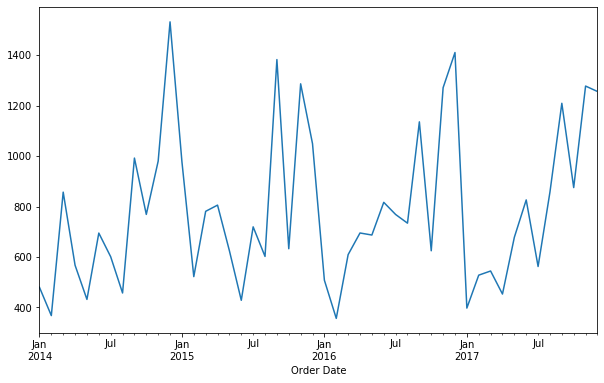

In [15]:
y.plot(figsize=(10,6)) 
plt.show() 

In [16]:
print(y.shape) 

(48,)


In [17]:
y.head(27)    

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
Freq: MS, Name: Sales, dtype: float64

In [18]:
train = y.loc[:'2016-12-01'] 
train.tail() 

Order Date
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
Freq: MS, Name: Sales, dtype: float64

In [19]:
test = y.loc['2017-01-01':] 
test.tail() 

Order Date
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

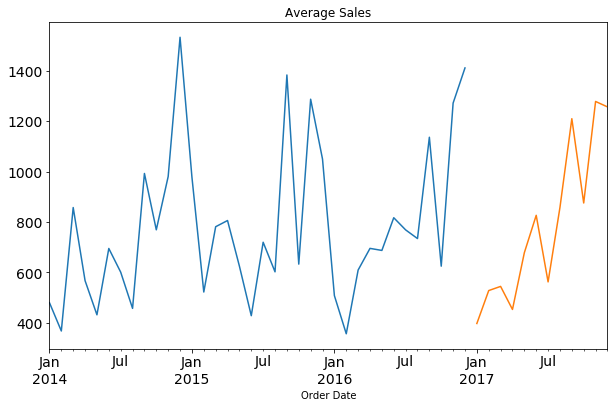

In [20]:
#plotting data
train.plot(figsize=(10,6), title='Average Sales', fontsize=14) 
test.plot(figsize=(10,6), title='Average Sales', fontsize=14) 
plt.show() 

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


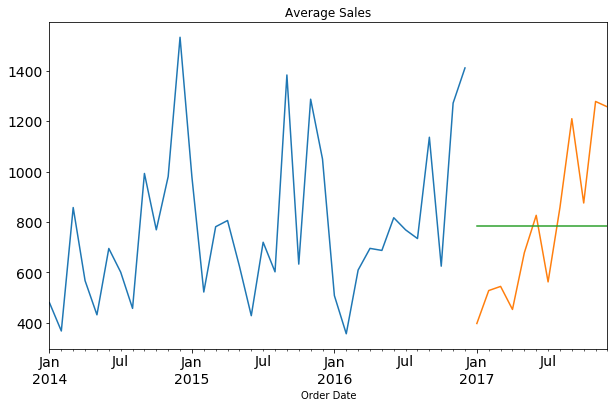

In [21]:
from statsmodels.tsa.api import SimpleExpSmoothing
Exp_Smooth = test.copy() 
#smoothing level = alpha
#alpha value should be in the range between 0 to 1
#values close to 0 indicate that the older values are less imp compared to the recent values
#values close to 1 indicate that the older values are equally imp
fit1 = SimpleExpSmoothing(train).fit(smoothing_level=0.01) 
Exp_Smooth['SES'] = fit1.forecast(len(test)) 

train.plot(figsize=(10,6), title='Average Sales', fontsize=14) 
test.plot(figsize=(10,6), title='Average Sales', fontsize=14) 
Exp_Smooth['SES'].plot(figsize=(10,6), title='Average Sales', fontsize=14) 
plt.show() 

In [22]:
from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(test, Exp_Smooth['SES'])) 
print(rms) 

303.4766840610878


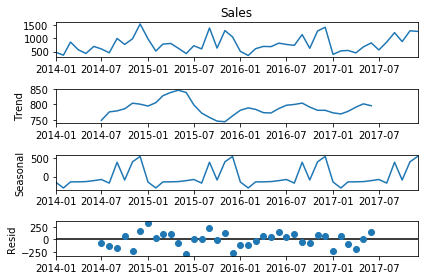

In [23]:
import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(y) 
fig = decomposition.plot() 
plt.show() 

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead
  after removing the cwd from sys.path.


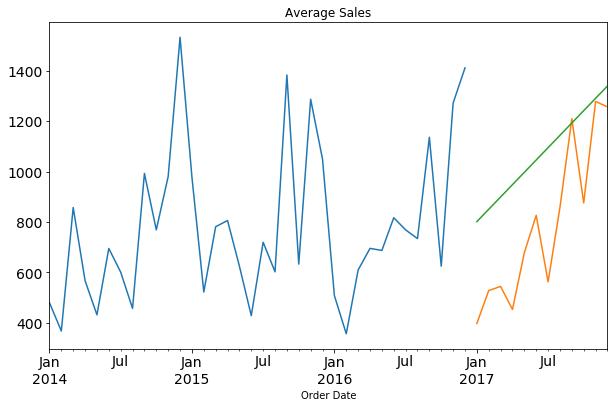

In [24]:
from statsmodels.tsa.api import Holt
Holt_df = test.copy() 
#smoothing slope = beta which is going to indicate the inclination of the line
fit1 = Holt(train).fit(smoothing_level=0.05, smoothing_slope=0.75) 
Holt_df['Holt_linear'] = fit1.forecast(len(test)) 

train.plot(figsize=(10,6), title='Average Sales', fontsize=14) 
test.plot(figsize=(10,6), title='Average Sales', fontsize=14) 
Holt_df['Holt_linear'].plot(figsize=(10,6), title='Average Sales', fontsize=14) 
plt.show() 

In [25]:
rms = np.sqrt(mean_squared_error(test, Holt_df['Holt_linear'])) 
print(rms) 

328.2798872745409


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:429: FutureWarning: After 0.13 initialization must be handled at model creation
  FutureWarning,


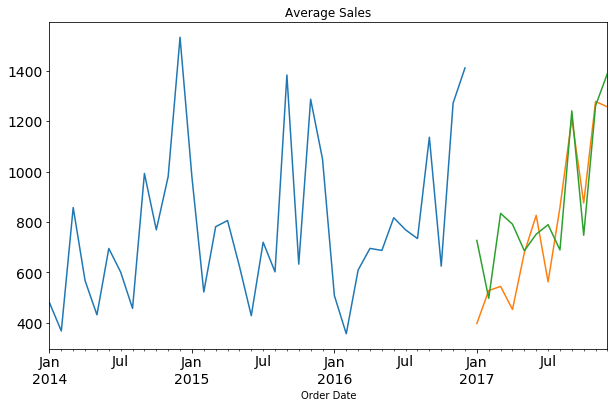

In [26]:
from statsmodels.tsa.api import ExponentialSmoothing
Holt_Winter_df = test.copy() 
#seasonal_periods = gamma
fit1 = ExponentialSmoothing(train, seasonal_periods=12, 
                           trend='add',
                           seasonal='add').fit() 
Holt_Winter_df['Holt_Winter'] = fit1.forecast(len(test)) 

train.plot(figsize=(10,6), title='Average Sales', fontsize=14) 
test.plot(figsize=(10,6), title='Average Sales', fontsize=14) 
Holt_Winter_df['Holt_Winter'].plot(figsize=(10,6), title='Average Sales', fontsize=14) 
plt.show() 

In [27]:
rms = np.sqrt(mean_squared_error(test, Holt_Winter_df['Holt_Winter'])) 
print(rms) 

188.897947577574


In [28]:
#H0 ----> Data is non stationary
#H1 ----> Data is stationary

In [29]:
#checking stationarity
from statsmodels.tsa.stattools import adfuller
result = adfuller(y)
print('ADF Statistic : ', result[0]) 
print('p-value: %f' %result[1]) 

ADF Statistic :  -5.191070187339264
p-value: 0.000009


In [30]:
#Since pvalue < 0.05 we reject the H0
#Our data is stationary

In [31]:
#performing differencing operation if the data was non stationary
#periods=1 indicates first order differencing
"""

f = y.diff(periods=1) 
f.plot(figsize=(10,6)) 
plt.show() 

"""

'\n\nf = y.diff(periods=1) \nf.plot(figsize=(10,6)) \nplt.show() \n\n'

In [32]:
"""
Box Jenkins method:
1. Identification - identify the optimum values for parameters PDQ - auto_arima() 
2. Estimation - build the model using the optium values
3. Validation - interpret how good is the model by validation testing
4. Forecatsing - forecast for future time periods
"""

'\nBox Jenkins method:\n1. Identification - identify the optimum values for parameters PDQ - auto_arima() \n2. Estimation - build the model using the optium values\n3. Validation - interpret how good is the model by validation testing\n4. Forecatsing - forecast for future time periods\n'

In [33]:
import pmdarima as pm

In [34]:
model = pm.auto_arima(y,start_p=0,d=None,start_q=0,max_p=5,max_d=2,max_q=5,start_P=0,D=None,start_Q=0,
              max_P=3,max_D=1,max_Q=3,max_order=10,m=12,seasonal=True,information_criterion='aic',
              test='adf',trace=True,random_state=10)  

C:\Users\HP\Anaconda3\lib\site-packages\pmdarima\arima\auto.py:523: ModelFitWarning: Having 3 or more differencing operations is not recommended. Please consider reducing the total number of differences.
  "number of differences.", ModelFitWarning)


Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,1,0)[12]             : AIC=524.319, Time=0.48 sec
 ARIMA(1,2,0)(1,1,0)[12]             : AIC=503.080, Time=0.34 sec


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:867: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(0,2,1)(0,1,1)[12]             : AIC=inf, Time=0.41 sec
 ARIMA(1,2,0)(0,1,0)[12]             : AIC=502.081, Time=0.08 sec


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:867: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(1,2,0)(0,1,1)[12]             : AIC=502.468, Time=0.38 sec


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:867: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(1,2,0)(1,1,1)[12]             : AIC=inf, Time=1.02 sec
 ARIMA(2,2,0)(0,1,0)[12]             : AIC=499.444, Time=0.14 sec
 ARIMA(2,2,0)(1,1,0)[12]             : AIC=497.244, Time=0.34 sec
 ARIMA(2,2,0)(2,1,0)[12]             : AIC=495.283, Time=0.90 sec


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:867: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(2,2,0)(3,1,0)[12]             : AIC=497.128, Time=3.92 sec


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:867: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


 ARIMA(2,2,0)(2,1,1)[12]             : AIC=inf, Time=2.53 sec


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:867: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:867: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(2,2,0)(1,1,1)[12]             : AIC=inf, Time=1.07 sec
 ARIMA(2,2,0)(3,1,1)[12]             : AIC=inf, Time=3.72 sec
 ARIMA(1,2,0)(2,1,0)[12]             : AIC=503.589, Time=1.54 sec
 ARIMA(3,2,0)(2,1,0)[12]             : AIC=490.119, Time=4.77 sec
 ARIMA(3,2,0)(1,1,0)[12]             : AIC=489.418, Time=0.58 sec
 ARIMA(3,2,0)(0,1,0)[12]             : AIC=495.271, Time=0.11 sec


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:867: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:867: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(3,2,0)(1,1,1)[12]             : AIC=inf, Time=1.38 sec


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:867: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


 ARIMA(3,2,0)(0,1,1)[12]             : AIC=inf, Time=1.05 sec
 ARIMA(3,2,0)(2,1,1)[12]             : AIC=inf, Time=4.50 sec
 ARIMA(4,2,0)(1,1,0)[12]             : AIC=491.409, Time=0.53 sec
 ARIMA(3,2,1)(1,1,0)[12]             : AIC=inf, Time=0.63 sec


C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:977: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 ARIMA(2,2,1)(1,1,0)[12]             : AIC=inf, Time=0.63 sec
 ARIMA(4,2,1)(1,1,0)[12]             : AIC=inf, Time=1.48 sec
 ARIMA(3,2,0)(1,1,0)[12] intercept   : AIC=491.413, Time=1.79 sec

Best model:  ARIMA(3,2,0)(1,1,0)[12]          
Total fit time: 34.626 seconds


In [35]:
model

ARIMA(order=(3, 2, 0), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      with_intercept=False)

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [37]:
model = SARIMAX(y,
               order=(3, 2, 0), seasonal_order=(1, 1, 0, 12)).fit() 

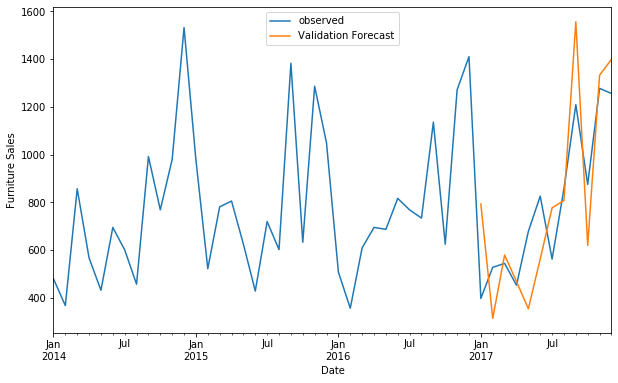

In [38]:
pred = model.get_prediction(start=pd.to_datetime('2017-01-01')) 
plt.figure(figsize=(10,6)) 
ax = y['2014':].plot(label='observed') 
pred.predicted_mean.plot(ax=ax, label='Validation Forecast') 
ax.set_xlabel('Date') 
ax.set_ylabel('Furniture Sales') 
plt.legend() 
plt.show() 

In [39]:
 pred.predicted_mean

Order Date
2017-01-01     792.949433
2017-02-01     314.265634
2017-03-01     579.803141
2017-04-01     468.932403
2017-05-01     354.687211
2017-06-01     562.948854
2017-07-01     777.172663
2017-08-01     807.929696
2017-09-01    1556.342077
2017-10-01     620.158823
2017-11-01    1332.648307
2017-12-01    1399.290965
Freq: MS, Name: predicted_mean, dtype: float64

In [40]:
Y_pred = pred.predicted_mean
Y_test = y['2017-01-01':] 

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(Y_pred, Y_test)) 
print(rms) 

230.0628518049095


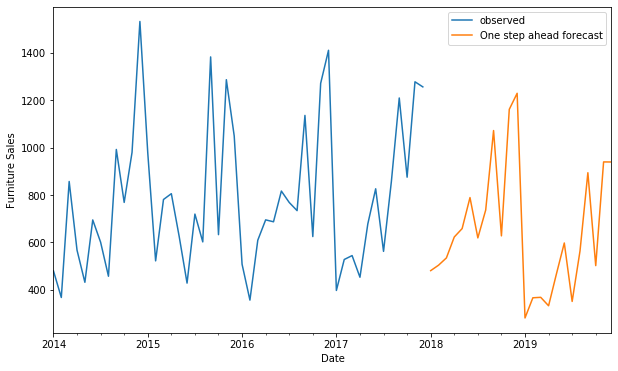

In [41]:
#get_prediction is for validation and get_forecast is for predicting for the future
pred_uc = model.get_forecast(steps=24) 
plt.figure(figsize=(10,6)) 
ax = y['2014':].plot(label='observed') 
pred_uc.predicted_mean.plot(ax=ax, label='One step ahead forecast') 
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales') 
plt.legend() 
plt.show() 

In [42]:
Y_predictions = pred_uc.predicted_mean
Y_predictions

2018-01-01     481.175774
2018-02-01     504.162659
2018-03-01     534.896795
2018-04-01     623.058221
2018-05-01     658.537424
2018-06-01     789.387647
2018-07-01     619.269483
2018-08-01     736.930488
2018-09-01    1072.136387
2018-10-01     627.864065
2018-11-01    1161.662846
2018-12-01    1229.291110
2019-01-01     281.479897
2019-02-01     366.641510
2019-03-01     368.590472
2019-04-01     332.952055
2019-05-01     467.423097
2019-06-01     597.821927
2019-07-01     351.289295
2019-08-01     564.248193
2019-09-01     894.202600
2019-10-01     502.332512
2019-11-01     939.780312
2019-12-01     939.527268
Freq: MS, Name: predicted_mean, dtype: float64